In [1]:

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
prices = pd.read_csv('BTC-USD.csv', parse_dates=['Date'])

In [3]:
prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-16,15955.577148,16816.181641,15880.706055,16716.111328,16716.111328,31526766675
1,2020-11-17,16685.691406,17782.919922,16564.544922,17645.406250,17645.406250,39006849170
2,2020-11-18,17645.191406,18393.949219,17352.906250,17804.005859,17804.005859,49064800278
3,2020-11-19,17803.861328,18119.546875,17382.554688,17817.089844,17817.089844,36985055355
4,2020-11-20,17817.083984,18773.226563,17765.794922,18621.314453,18621.314453,36992873940


In [4]:
# Sort prices data by parsed date
prices = prices.sort_values(by='Date')
prices.set_index('Date', inplace=True)

In [5]:
prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-16,15955.577148,16816.181641,15880.706055,16716.111328,16716.111328,31526766675
2020-11-17,16685.691406,17782.919922,16564.544922,17645.406250,17645.406250,39006849170
2020-11-18,17645.191406,18393.949219,17352.906250,17804.005859,17804.005859,49064800278
2020-11-19,17803.861328,18119.546875,17382.554688,17817.089844,17817.089844,36985055355
2020-11-20,17817.083984,18773.226563,17765.794922,18621.314453,18621.314453,36992873940


In [6]:
# Calculate percentage simple return
# Note that first day will be nan 
prices['SimpleReturns'] = prices['Adj Close'].pct_change()

In [7]:
prices

,Open,High,Low,Close,Adj Close,Volume,SimpleReturns
Date,,,,,,,
2020-11-16,15955.577148,16816.181641,15880.706055,16716.111328,16716.111328,31526766675,NaN
2020-11-17,16685.691406,17782.919922,16564.544922,17645.406250,17645.406250,39006849170,0.055593
2020-11-18,17645.191406,18393.949219,17352.906250,17804.005859,17804.005859,49064800278,0.008988
2020-11-19,17803.861328,18119.546875,17382.554688,17817.089844,17817.089844,36985055355,0.000735
2020-11-20,17817.083984,18773.226563,17765.794922,18621.314453,18621.314453,36992873940,0.045138
...,...,...,...,...,...,...,...
2021-11-12,64863.980469,65460.816406,62333.914063,64155.941406,64155.941406,36084893887,-0.012225
2021-11-13,64158.121094,64915.675781,63303.734375,64469.527344,64469.527344,30474228777,0.004888
2021-11-14,64455.371094,65495.179688,63647.808594,65466.839844,65466.839844,25122092191,0.015470


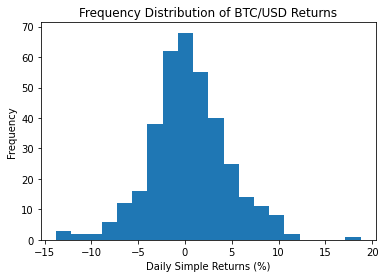

In [8]:
# Plot frequency distribution of returns
pct_returns = prices.SimpleReturns.dropna().to_numpy() * 100
plt.hist(pct_returns, bins=math.ceil(np.sqrt(len(prices.SimpleReturns.dropna()))), density=False)
plt.title('Frequency Distribution of BTC/USD Returns')
plt.xlabel('Daily Simple Returns (%)')
plt.ylabel('Frequency')
plt.show()

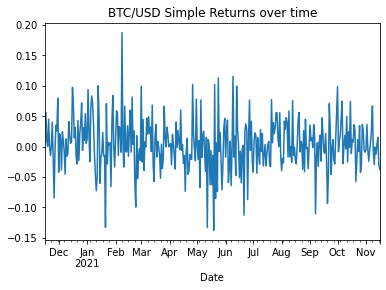

In [9]:
# Plot returns as time series
prices.SimpleReturns.plot()
plt.title('BTC/USD Simple Returns over time')
plt.show()